In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [120]:
df = pd.read_csv("data/shannon-data.csv")

# Convert dates
df["chirpstack_time"] = pd.to_datetime(df["chirpstack_time"], unit='ms')
df['chirpstack_time'] = df['chirpstack_time'].dt.tz_localize('utc').dt.tz_convert('Australia/Brisbane')
df["server_time"] = pd.to_datetime(df["server_time"], unit='ms')
df['server_time'] = df['server_time'].dt.tz_localize('utc').dt.tz_convert('Australia/Brisbane')

# Add locations
location_dictionary = {
    'EM300-1': 'Outside',
    'EM300-2': 'Bedroom',
    'EM300-3': 'Downstairs',
}
df['Location'] = df['devName'].map(location_dictionary) 
df.head()

df.head()

,chirpstack_time,server_time,devName,devEui,humidity,temperature,Location
0,2022-09-02 10:24:17.302000+10:00,2022-09-02 10:24:17.614000+10:00,EM300-1,24e124136c195948,67.5,17.6,Outside
1,2022-09-02 10:29:11.876000+10:00,2022-09-02 10:29:12.159000+10:00,EM300-1,24e124136c195948,84.5,18.7,Outside
2,2022-09-02 10:34:11+10:00,2022-09-02 10:34:12.193000+10:00,EM300-1,24e124136c195948,84.5,18.6,Outside
3,2022-09-02 10:39:11+10:00,2022-09-02 10:39:12.154000+10:00,EM300-1,24e124136c195948,84.5,18.6,Outside
4,2022-09-02 10:40:10+10:00,2022-09-02 10:40:10.829000+10:00,EM300-2,24e124136b327793,67.5,17.6,Bedroom


In [125]:
def plot_sensors(measurement="temperature"):
    temp_df = df.pivot(index="chirpstack_time", columns="Location", values=measurement)
    temp_df = temp_df.resample('30Min').mean()
    temp_df.head()
    ax = temp_df.plot(figsize=(13,7), lw=2, x_compat=True)
    plt.xlabel("Time")
    if measurement == "temperature":
        plt.ylabel("Temperature (°C)")
    else:
        plt.ylabel("Relative Humidity (%)")
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.show()

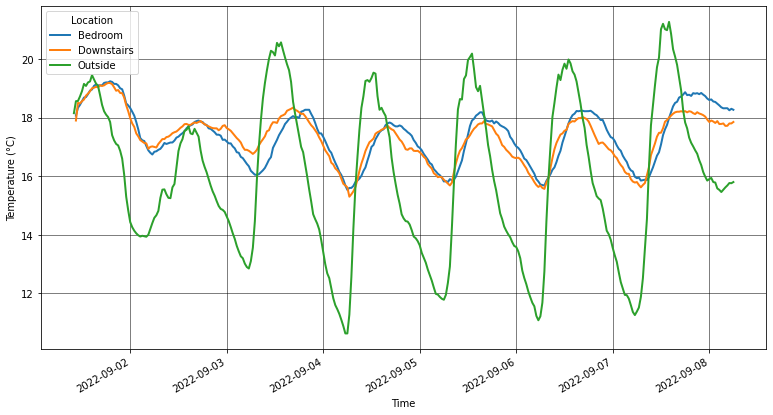

In [126]:
plot_sensors()

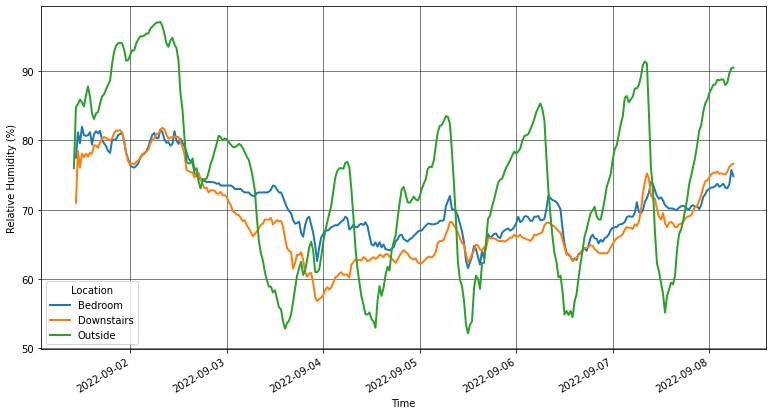

In [127]:
plot_sensors("humidity")

In [76]:
df_1 = df[df["devName"] == "EM300-1"]
df_2 = df[df["devName"] == "EM300-2"]
df_3 = df[df["devName"] == "EM300-3"]

def plot_sensor(passed_df):
    df_plot = passed_df[["chirpstack_time", "humidity", "temperature"]]
    df_plot = df_plot.set_index("chirpstack_time")
    df_plot.plot()
    plt.show()

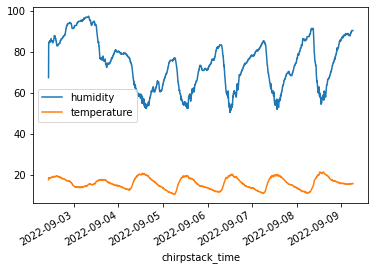

In [77]:
plot_sensor(df_1)

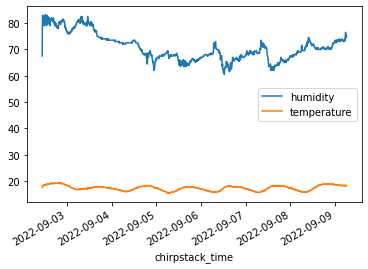

In [78]:
plot_sensor(df_2)

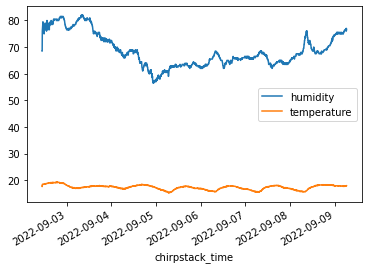

In [79]:
plot_sensor(df_3)